In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import seaborn as sns
%matplotlib inline

In [3]:
reddit_news_df = pd.read_csv("Combined_News_DJIA.csv")

## Cleanup


In [4]:
# Checking if any value is null in the columns
for col in reddit_news_df:
    print(col, reddit_news_df[col].isnull().values.any())

Date False
Label False
Top1 False
Top2 False
Top3 False
Top4 False
Top5 False
Top6 False
Top7 False
Top8 False
Top9 False
Top10 False
Top11 False
Top12 False
Top13 False
Top14 False
Top15 False
Top16 False
Top17 False
Top18 False
Top19 False
Top20 False
Top21 False
Top22 False
Top23 True
Top24 True
Top25 True


So it appears only the last 3 columns contain null values. Lets see how many rows.

In [5]:
reddit_news_df[reddit_news_df['Top23'].isnull() | reddit_news_df['Top24'].isnull() | reddit_news_df['Top25'].isnull()]

,Date,Label,Top1,Top2,Top3,Top4,Top5,Top6,Top7,Top8,...,Top16,Top17,Top18,Top19,Top20,Top21,Top22,Top23,Top24,Top25
277,2009-09-15,1,b'The Church of Scientology won\'t be dissolve...,b'New virus from rats can kill 80 per cent of ...,b'The gruesome spectacle of dolphins being sla...,b'The End of Innocence in Afghanistan: \'The G...,b'France approves Internet piracy bill',b'The Rural Doctors Association says right now...,b'Al Jazeera English - Africa - Shabab to aven...,"b""How Sri Lanka governs through detentions - S...",...,b'In an equine echo of the controversy surroun...,b'UPDATE: 5-New York homes raided in terrorism...,b'Population Growth Impeding Progress on the M...,b'Global Population to Reach 7 Billion by 2011',b'Government Funded Feminist Porn ',b'Can someone enlighten me re:Holy Land disput...,b'Human Rights Watch official suspended for co...,NaN,NaN,NaN
348,2009-12-24,1,b'Woman knocks down Pope Benedict at Christmas...,b'Ugandan President Museveni says he will bloc...,"b""Venezuela's Chavez threatens to kick out car...",b'Woman who knocked down pope had pasta in her...,"b'450 people from 21 countries, including 30 f...",b'Chvez declares Angel Falls is no more: World...,b'Drug tests catch out 10 police (UK)',"b'Once the worlds fourth-largest lake, the Ara...",...,b'Pig farts spark Australia gas scare - I shit...,b'Bin Laden daughter flees to Saudi embassy in...,b'Traumatic Brain Injuries: Growing evidence ...,b'The Pakistan Supreme Court has ordered the P...,"b""Here's a video the Taliban released this mor...",b'Fireworks set off aboard airliner',"b'Five VA men may face terrorism charges, Paki...","b""Ayatollah Montazeri's Legacy: In death he m...",NaN,NaN
681,2011-04-21,1,"Director of ""Restrepo"" and Photographer Chris ...",Everyone within 20km of Fukushima will be forc...,Bahrain: Activist Zaynab Al-Khawaja's letter t...,"More than 80,000 people are claiming incapacit...",Libya: 'mission creep' claims as UK sends in m...,Japan considers banning access to evacuation zone,Chinese oil giant Sinopec has stopped exportin...,6.0-magnitude earthquake strikes off east coas...,...,Russian migration official fired in racism row...,Small amounts of radioactive iodine found in b...,"War photographer, Oscar-nominated film directo...",Effeminate boys are being sent to a special ca...,Japan Government Declares 12-Mile Area Around ...,TEPCO admitted Wednesday that nuclear fuel in ...,Fukushima evacuees face arrest if they return ...,Prince Charles wins some kind of a record,NaN,NaN


Only three rows contain null values. So I'll be removing these rows. 
Its a small amount and there is no way to replace them with useful values.

In [6]:
reddit_news_df = reddit_news_df.dropna()

## What news headlines topics capture user attention?

Before doing sentiment analysis lets first look at topics that are common in the Top1 headlines and see if they can be considered positive or negative. With Reddit being an american wesbite, it obviously means that the majority of its users would be american, but is that reflected in the headlines upvoted? Here I'll look at the top occuring words in the Top1 headlines to see what kind of words/topics capture attention.

In [7]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')

# this can maybe be put lower, after the cleaning section
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize 
import string
import re
from collections import Counter, defaultdict

# Getting all top1 headlines.
top1_headlines_list = reddit_news_df['Top1']

# Removing the unnecessary b's in front of the strings in the column
top1_headlines_list = [headline.replace('b"', '').replace('b\'', "'") for headline in top1_headlines_list]

headlineCollection = ""

# Join all strings/headlines together
for headline in top1_headlines_list:
    headlineCollection += headline

# Don't want to keep track of punctuation
headlineCollection = re.sub(r"[,.;@#?!&$]+\ *", " ", headlineCollection)

# Put each word of each headline in a list for the counter. Removing common words like 'the', 'as'
stop_words = set(stopwords.words('english')) 
word_tokens = word_tokenize(headlineCollection) 
  
headlineCollectionList = [w for w in word_tokens if not w in stop_words] 

wordCount = dict(Counter(headlineCollectionList))
wordCountSorted = sorted(wordCount.items(), key=lambda x: x[1], reverse=True)
print('Top 100 words(in terms of occurence):\n')
print(wordCountSorted[:100])

[nltk_data] Downloading package stopwords to /home/yash77/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /home/yash77/nltk_data...


Top 100 words(in terms of occurence):

[('``', 540), ("''", 397), (':', 317), ("'s", 304), ('The', 207), ('-', 190), ("'", 174), ('(', 88), (')', 87), ('US', 84), ('says', 81), ('people', 77), ('000', 77), ('government', 75), ('A', 69), ('world', 66), ('%', 61), ('I', 60), ('police', 58), ('years', 58), ('new', 57), ('one', 50), ('first', 50), ("n't", 49), ('World', 48), ('U', 47), ('Israel', 47), ('In', 47), ('million', 46), ('UK', 45), ('drug', 45), ('law', 45), ('Korea', 44), ('said', 44), ('S', 43), ('1', 42), ('would', 42), ('China', 42), ('found', 41), ('country', 40), ('killed', 40), ('war', 37), ('Chinese', 37), ('New', 37), ('year', 35), ('North', 35), ('It', 35), ('British', 34), ('women', 33), ('public', 33), ('Canada', 33), ('3', 32), ('could', 32), ('time', 32), ('say', 32), ('Saudi', 31), ('To', 31), ('woman', 31), ('UN', 31), ('state', 31), ('2', 31), ('death', 31), ('Snowden', 31), ('Russian', 30), ('Israeli', 30), ('amp', 30), ('human', 30), ('man', 29), ('American', 2

[nltk_data]   Package punkt is already up-to-date!


String cleanup wasn't entirely successful. Which is why  's are counted. Regardless, the occurence of words like US, Israel/Israeli, government, Korea and Chinese/China implies that there is a mix of US news and actual world(outside US) news. This is good to know since both domestic and international events can cause changes in the stock market.

Just by glancing at the words, some of the main topics seem to be negative. There are a fair amount of articles with the words killed, death and war.

# Sentiment analysis comparison between Top1 Headlines and lower position headlines

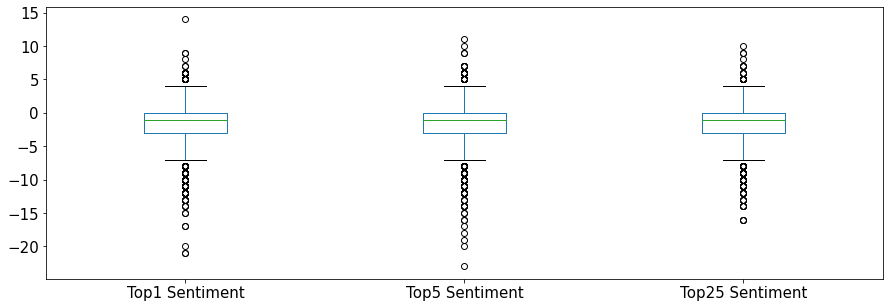

In [8]:
# TODO
from afinn import Afinn
af = Afinn()

top5_headlines = reddit_news_df['Top5']
top5_headlines_list = [headline.replace('b"', '').replace('b\'', "'") for headline in top5_headlines]

top25_headlines = reddit_news_df['Top25']
top25_headlines_list = [headline.replace('b"', '').replace('b\'', "'") for headline in top25_headlines]

top1_sentiment_scores = [af.score(headline) for headline in top1_headlines_list]
top5_sentiment_scores = [af.score(headline) for headline in top5_headlines_list]
top25_sentiment_scores = [af.score(headline) for headline in top25_headlines_list]

sen_df = pd.DataFrame({'Top1 Sentiment': top1_sentiment_scores, 'Top5 Sentiment': top5_sentiment_scores, 'Top25 Sentiment': top25_sentiment_scores})

boxplot = sen_df.boxplot(grid=False, rot=0, fontsize=15, figsize=(15,5))

Suprisingly, comparing sentiment analysis between top1, top5, and top25 headlines shows that there is no correlation between upvotes and how negative or positive a headline is. What stands out is that they appear to have the same distribution of values and the median of the sentiment values is at around the same position. They appear to be skewed slighly towards negative values and have more negative outliers than positive.

In [9]:
print('Median of Top1:', sen_df['Top1 Sentiment'].median())
print('Median of Top5:', sen_df['Top5 Sentiment'].median())
print('Median of Top25:', sen_df['Top25 Sentiment'].median())
print('Average of 1:', sen_df['Top1 Sentiment'].mean())
print('Average of Top5:', sen_df['Top5 Sentiment'].mean())
print('Average of Top25:', sen_df['Top25 Sentiment'].mean())
print('Min of 1:', sen_df['Top1 Sentiment'].min())
print('Min of Top5:', sen_df['Top5 Sentiment'].min())
print('Min of Top25:', sen_df['Top25 Sentiment'].min())

Median of Top1: -1.0
Median of Top5: -1.0
Median of Top25: -1.0
Average of 1: -1.6858006042296072
Average of Top5: -1.8036253776435045
Average of Top25: -1.688821752265861
Min of 1: -21.0
Min of Top5: -23.0
Min of Top25: -16.0


One observation here is that Top1 and Top5 have headline(s) substantialy more negative than Top25. Indicating that few extremely negative headlines are upvoted.

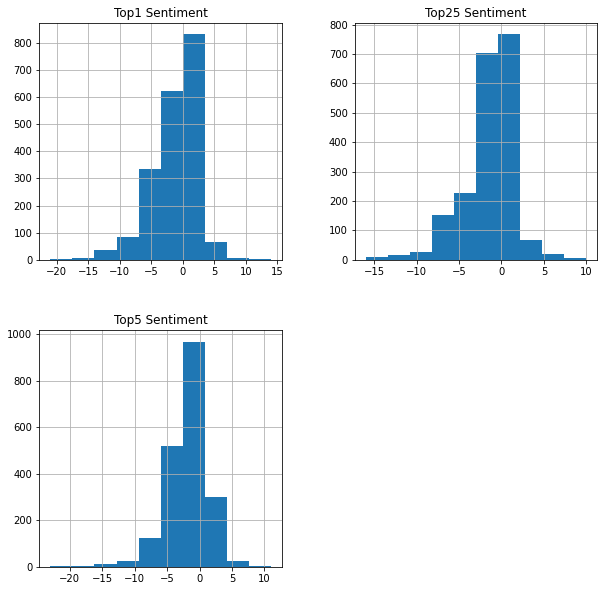

In [10]:
hist = sen_df.hist(figsize=(10,10))

Histograms of the sentiments in the different columns shows that the majority of positive headlines have a score between 0 and 5. Furthermore, the majority of negative headlines have a score between -5 and 0. Indicating that headlines aren't overwhelmingly positive or negative.

## Correlation between headlines and market movement

In the following section we'll see if the sentiment value of the headlines is correlated to how the market reacts.

In [11]:
row = 0
djiaVals = []

for headline in top1_headlines_list:
    djiaVals.append(reddit_news_df['Label'].iloc[row])
    row += 1
    
correlation_df = pd.DataFrame({'Investor Sentiment': djiaVals, 'Top1 Sentiment Scores': top1_sentiment_scores})

print('Top1:', correlation_df['Top1 Sentiment Scores'].corr(correlation_df['Investor Sentiment']))

row = 0
djiaVals = []

for headline in top5_headlines_list:
    djiaVals.append(reddit_news_df['Label'].iloc[row])
    row += 1
    
correlation_df = pd.DataFrame({'Investor Sentiment': djiaVals, 'Top5 Sentiment Scores': top5_sentiment_scores})

print('Top5:', correlation_df['Top5 Sentiment Scores'].corr(correlation_df['Investor Sentiment']))

row = 0
djiaVals = []

for headline in top25_headlines_list:
    djiaVals.append(reddit_news_df['Label'].iloc[row])
    row += 1
    
correlation_df = pd.DataFrame({'Investor Sentiment': djiaVals, 'Top25 Sentiment Scores': top25_sentiment_scores})

print('Top25:', correlation_df['Top25 Sentiment Scores'].corr(correlation_df['Investor Sentiment']))

Top1: 0.013808998534085713
Top5: 0.009760696259150709
Top25: -0.011669640259827016


With such a low correlation value, it appears that sentiment analysis values of headlines is not correlated with DJIA closing values. So lets see if this holds true for specific topics.

# Analysis on certain headline topics

Maybe some topics are better at predicting the movement of the market.

Topics analyzed:
* North Korea
* US
* War

## Does North Korea's actions scare investors? 
North Korea, since 2000, has been in news headlines most notably for its nuclear weapons program. Many times this has caused concerns that North Korea will launch missiles towards the US. 

In the following cells, headlines containing North Korea will be analyzed to see the effect North Korea has on investors and the the overall emotions of the headlines.

# Sentiment analysis of headlines about North Korea
Using top1 headlines. 

Text(0.5, 1.0, 'Sentiment of headlines involving North Korea')

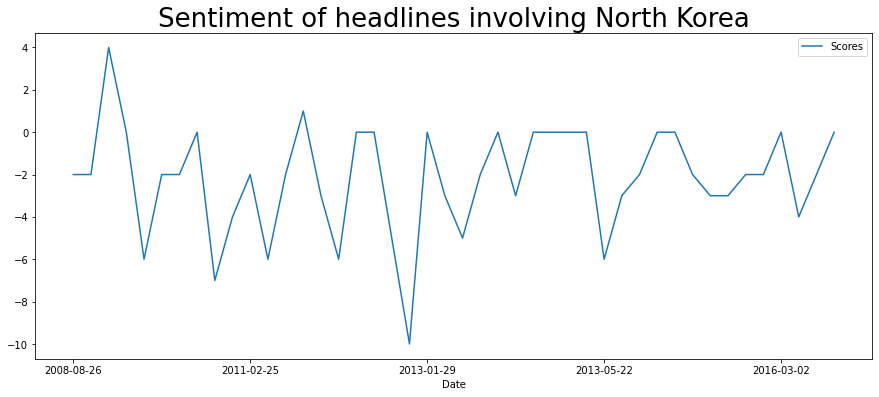

In [12]:
northKoreaHeadlines = []
headlineDates = []
djiaVals = []
row = 0
for headline in top1_headlines_list:
    if ('North' in headline or 'north' in headline) and ('Korea' in headline or 'korea' in headline):
        northKoreaHeadlines.append(headline)
        headlineDates.append(reddit_news_df['Date'].iloc[row])
        djiaVals.append(reddit_news_df['Label'].iloc[row])
    row += 1

sentiment_scores = [af.score(headline) for headline in northKoreaHeadlines]

sen_df = pd.DataFrame({'Scores': sentiment_scores, 'Date': headlineDates})

lines = sen_df.plot.line(x='Date', y='Scores', figsize=(15, 6))
lines.set_title("Sentiment of headlines involving North Korea", {'fontsize': 26})

Using sentiment analysis on the headlines reveals that they're mainly negative. With only 2 in the dataset with having a positive sentiment. Now lets how investors responded.

For this, the Label column will be used. A value of 1 means DJIA Adj Close value rose or stayed as the same and a value of 0 means DJIA Adj Close value decreased.

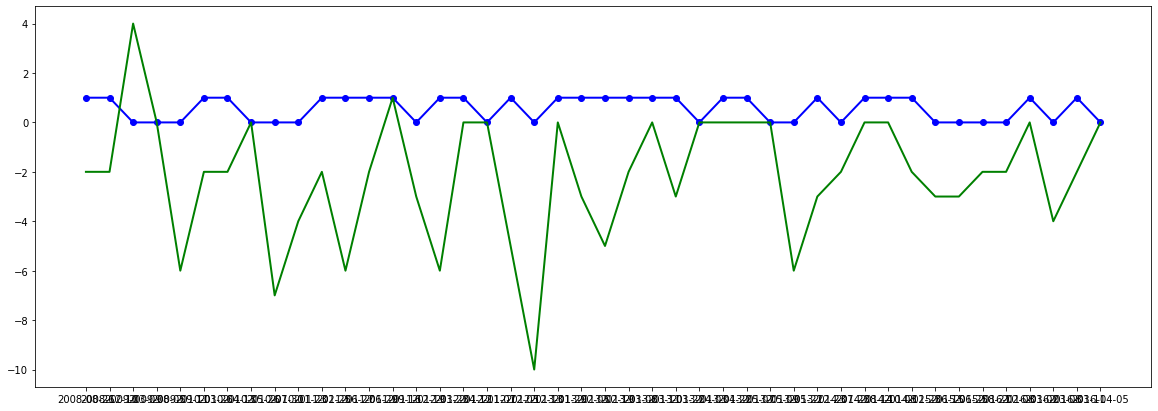

In [13]:
nk_df = pd.DataFrame({'Investor Sentiment': djiaVals, 'Sentiment Scores': sentiment_scores, 'Date': headlineDates})

plt.rcParams["figure.figsize"] = (20,7)
plt.plot( 'Date', 'Investor Sentiment', data=nk_df, marker='o', color='blue', linewidth=2)
plt.plot( 'Date', 'Sentiment Scores', data=nk_df, marker='', color='green', linewidth=2)

Looking at the graph there doesn't seem to be a correlation between the emotional sentiment of the headlines and investor actions. Calculating the correlation coefficient also supports this:

In [14]:
nk_df['Sentiment Scores'].corr(nk_df['Investor Sentiment'])

0.11809826530920432

## Top1 vs Top5 North Korea headlines

Number of headlines containing North Korea in the Top1 column: 44
Number of headlines containing North Korea in the Top5 column: 41


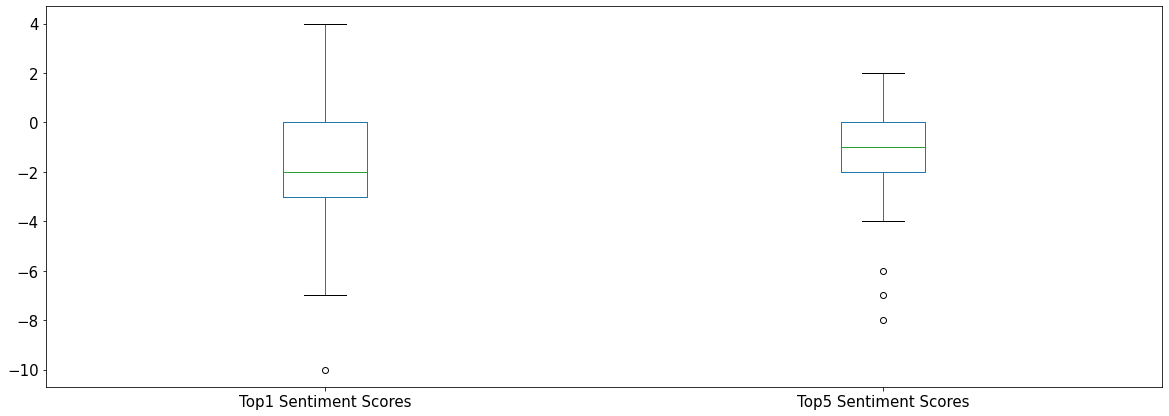

In [15]:
top5_headlines_list = reddit_news_df['Top5']
top5_headlines_list = [headline.replace('b"', '').replace('b\'', "'") for headline in top5_headlines_list]

northKoreaHeadlines = []
headlineDates = []
djiaVals = []
row = 0

for headline in top5_headlines_list:
    if ('North' in headline or 'north' in headline) and ('Korea' in headline or 'korea' in headline):
        northKoreaHeadlines.append(headline)
        headlineDates.append(reddit_news_df['Date'].iloc[row])
        djiaVals.append(reddit_news_df['Label'].iloc[row])
    row += 1

sentiment_scoresTop5 = [af.score(headline) for headline in northKoreaHeadlines]

print('Number of headlines containing North Korea in the Top1 column:', len(sentiment_scores))
print('Number of headlines containing North Korea in the Top5 column:', len(sentiment_scoresTop5))

s1 = pd.Series(sentiment_scores, name='Top1 Sentiment Scores')
s2 = pd.Series(sentiment_scoresTop5, name='Top5 Sentiment Scores')
df = pd.concat([s1,s2], axis=1)
df.head(100)
boxplot = df.boxplot(grid=False, rot=0, fontsize=15)

It appears that the Top5 headlines containing North Korea are overall less negative than the Top1 headlines. It has a higher median and a lower maximum negative sentiment score.

## How do investors react when the US is in the headlines? Are the headlines positive or negative?

## Sentiment analysis of headlines about the US
Using top1 headlines. 

Text(0.5, 1.0, 'Sentiment of headlines involving the US')

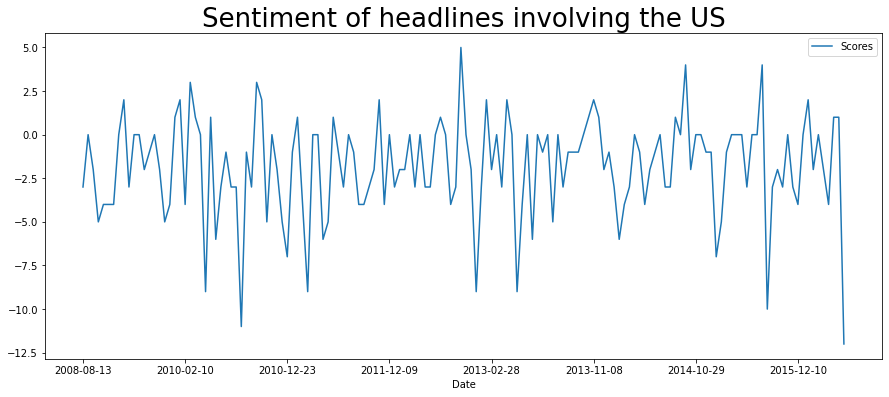

In [16]:
usHeadlines = []
headlineDates = []
djiaVals = []
row = 0

for headline in top1_headlines_list:
    if 'US' in headline or 'USA' in headline or'U.S' in headline or 'U.S.A' in headline:
        usHeadlines.append(headline)
        headlineDates.append(reddit_news_df['Date'].iloc[row])
        djiaVals.append(reddit_news_df['Label'].iloc[row])
    row += 1

sentiment_scores = [af.score(headline) for headline in usHeadlines]

sen_df = pd.DataFrame({'Scores': sentiment_scores, 'Date': headlineDates})

lines = sen_df.plot.line(x='Date', y='Scores', figsize=(15, 6))
lines.set_title("Sentiment of headlines involving the US", {'fontsize': 26})

Taking a glance at the sentiment overtime shows that it dramatically becomes positive and negative. More so than headlines containing North Korea. Also it seems that there more negatives than positives, so lets look at the mean and median to be sure.

In [17]:
print('Median sentiment score:', sen_df['Scores'].median())
print('Mean sentiment score:', sen_df['Scores'].mean())

Median sentiment score: -1.0
Mean sentiment score: -1.8266666666666667


So while sentiment seems to peek more towards the negative side, the headlines are actually slightly negative on average. Now lets look at the correlation between sentiment and DJIA closing value.

In [18]:
correlation_df = pd.DataFrame({'Investor Sentiment': djiaVals, 'Top1 Sentiment Scores': sentiment_scores})
correlation_df['Top1 Sentiment Scores'].corr(correlation_df['Investor Sentiment'])

-0.0779064962046352

Once again it seems that there is no major correlation between sentiment of Top1 headlines and DJIA closing value.

## Top1 vs Top5 US headlines

Number of headlines containing US in the Top1 column: 150
Number of headlines containing US in the Top5 column: 167


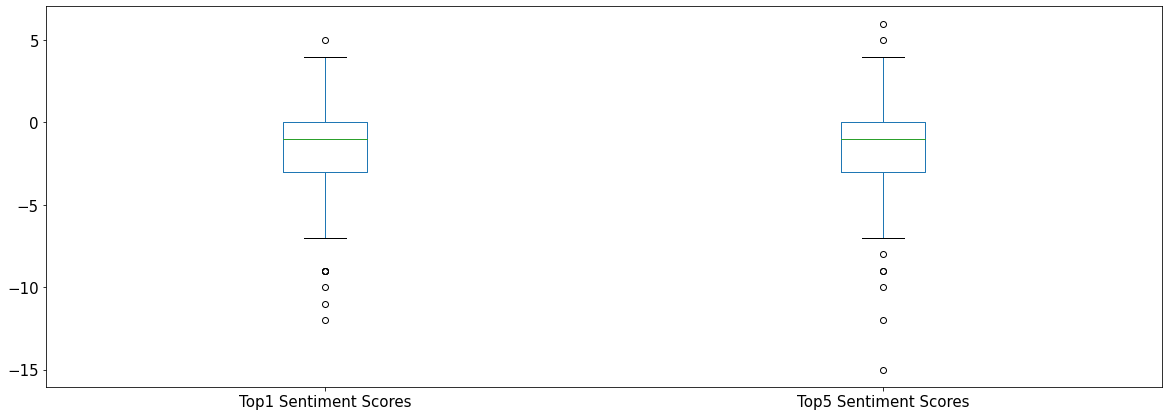

In [19]:
top5_headlines_list = reddit_news_df['Top5']
top5_headlines_list = [headline.replace('b"', '').replace('b\'', "'") for headline in top5_headlines_list]

usHeadlines = []
headlineDates = []
djiaVals = []
row = 0

for headline in top5_headlines_list:
    if 'US' in headline or 'USA' in headline or'U.S' in headline or 'U.S.A' in headline:
        usHeadlines.append(headline)
        headlineDates.append(reddit_news_df['Date'].iloc[row])
        djiaVals.append(reddit_news_df['Label'].iloc[row])
    row += 1

sentiment_scoresTop5 = [af.score(headline) for headline in usHeadlines]

print('Number of headlines containing US in the Top1 column:', len(sentiment_scores))
print('Number of headlines containing US in the Top5 column:', len(sentiment_scoresTop5))

s1 = pd.Series(sentiment_scores, name='Top1 Sentiment Scores')
s2 = pd.Series(sentiment_scoresTop5, name='Top5 Sentiment Scores')
df = pd.concat([s1,s2], axis=1)
df.head(100)
boxplot = df.boxplot(grid=False, rot=0, fontsize=15)

Once again, tt appears that the Top5 headlines are overall less negative than the Top1 headlines. However, this time it appears that the Top5 median is slightly less negative than the Top1.

## War. How do investors react?

War is generally seen as a negative thing, will sentiment analysis reflect that? And will it once again be shown that sentiment and DJIA closing value have little correlation?

Text(0.5, 1.0, 'Sentiment of headlines involving war')

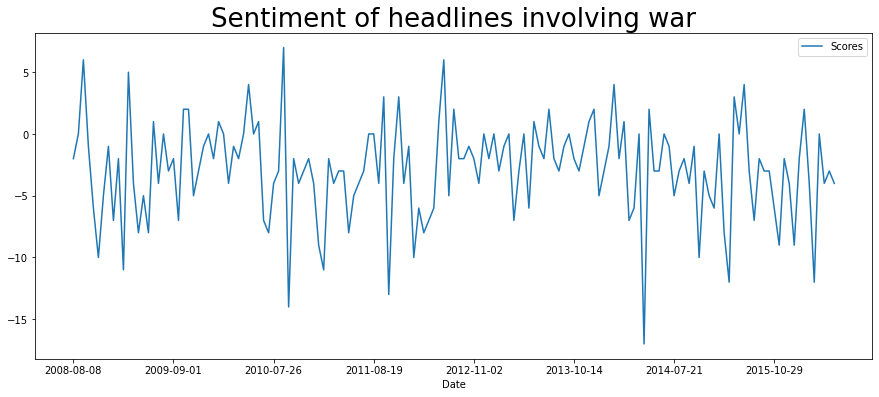

In [20]:
warHeadlines = []
headlineDates = []
djiaVals = []
row = 0

for headline in top1_headlines_list:
    if 'war' in headline or 'War' in headline:
        warHeadlines.append(headline)
        headlineDates.append(reddit_news_df['Date'].iloc[row])
        djiaVals.append(reddit_news_df['Label'].iloc[row])
    row += 1

sentiment_scores = [af.score(headline) for headline in warHeadlines]

sen_df = pd.DataFrame({'Scores': sentiment_scores, 'Date': headlineDates})

lines = sen_df.plot.line(x='Date', y='Scores', figsize=(15, 6))
lines.set_title("Sentiment of headlines involving war", {'fontsize': 26})

Taking a glance at the sentiment overtime shows that it appears generally negative and is suprisingly positive at times. Lets look at the mean and median to be sure.

In [21]:
print('Median sentiment score:', sen_df['Scores'].median())
print('Mean sentiment score:', sen_df['Scores'].mean())

Median sentiment score: -3.0
Mean sentiment score: -2.869281045751634


On average more negative than headlines containing the US, but can it be a better indicator for DJIA closing value than headlines about the US or North Korea?

In [22]:
correlation_df = pd.DataFrame({'Investor Sentiment': djiaVals, 'Top1 Sentiment Scores': sentiment_scores})
correlation_df['Top1 Sentiment Scores'].corr(correlation_df['Investor Sentiment'])

0.028187530126670364

Once again it seems that there is no major correlation between sentiment of Top1 headlines and DJIA closing value.

Number of headlines containing US in the Top1 column: 153
Number of headlines containing US in the Top5 column: 149


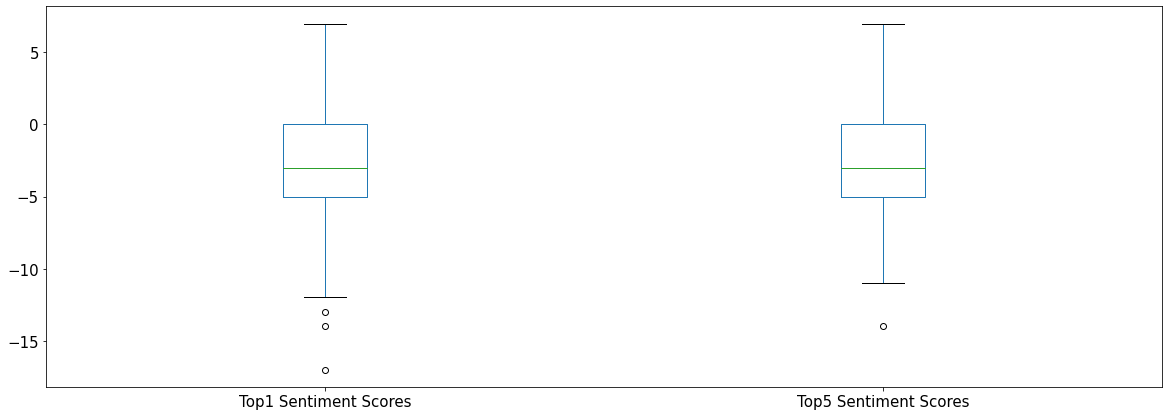

In [23]:
top5_headlines_list = reddit_news_df['Top5']
top5_headlines_list = [headline.replace('b"', '').replace('b\'', "'") for headline in top5_headlines_list]

warHeadlines = []
headlineDates = []
djiaVals = []
row = 0

for headline in top5_headlines_list:
    if 'war' in headline or 'War' in headline:
        warHeadlines.append(headline)
        headlineDates.append(reddit_news_df['Date'].iloc[row])
        djiaVals.append(reddit_news_df['Label'].iloc[row])
    row += 1

sentiment_scoresTop5 = [af.score(headline) for headline in warHeadlines]

print('Number of headlines containing US in the Top1 column:', len(sentiment_scores))
print('Number of headlines containing US in the Top5 column:', len(sentiment_scoresTop5))

s1 = pd.Series(sentiment_scores, name='Top1 Sentiment Scores')
s2 = pd.Series(sentiment_scoresTop5, name='Top5 Sentiment Scores')
df = pd.concat([s1,s2], axis=1)
df.head(100)
boxplot = df.boxplot(grid=False, rot=0, fontsize=15)

Suprisingly in the case of war headlines, there doesn't seem to be much difference between top1 and top5

# Conclusions
Sentiment analysis values of Top1 Headlines do not show any correlation with how investors react. This makes sense, investors probably don't care for the majority of headlines and shouldn't be expected to sell of stocks for every negative headline there is. Furthermore, it appears that lesser upvoted headlines generally aren't more positive or negative. Though for the topics we covered, it appears that less popular headlines are slightly less negative than the popular ones